<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw_crr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''======
run once, then comment it off, and run again
========'''
!git clone https://github.com/hechen2020/19ma573HuixinChen.git

Cloning into '19ma573HuixinChen'...
remote: Enumerating objects: 354, done.
remote: Total 354 (delta 0), reused 0 (delta 0), pack-reused 354
Receiving objects: 100% (354/354), 1.41 MiB | 3.67 MiB/s, done.
Resolving deltas: 100% (122/122), done.


In [2]:
cd ./19ma573HuixinChen/src/

/content/19ma573HuixinChen/src


In [0]:
from contract_v01 import VanillaOption
from sde_1d_v01 import Gbm_1d

**Compute BSM call value**

In [0]:
#initial state
gbm1 = Gbm_1d(
    init_state = 100.,
    drift_ratio = 0.05,
    vol_ratio = .2
)

In [0]:
#call option
option1 = VanillaOption(
    otype = 1,
    maturity = 1,
    strike = 100
)

In [6]:
#option price
price1 = gbm1.bsm_price(option1)
print('The BSM call price is ' + str(price1))

The BSM call price is 10.450583572185565


**Compute value of CRR(N=2000)**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def crr_fcn(gbm, option, N):
  s0 = gbm.init_state
  sigma = gbm.vol_ratio
  K = option.strike
  T = option.maturity
  r = gbm.drift_ratio
  dt = T/N #t step
  dx = sigma*np.sqrt(dt)
#  nt = N
#  nx = N #need 2n+1 spaces for dx if dt takes N spaces
  
  u = np.exp(sigma*np.sqrt(dt))#stock going up increment
  d = np.exp(-sigma*np.sqrt(dt))#stock going down increment
  
  p = (np.exp(r*dt)-d)/(u-d)#prob of stock going up
  q = 1 - p#prob of stock going down
  
  s = np.zeros((N+1,N+1))#initialize stock matrix
  s[0][0] = s0#initialize stock value
  
  #crr tree
  for i in range(1,N+1):
    s[i][0] = s[i-1][0]*u
    for j in range(1,i+1):
      s[i][j] = s[i-1][j-1]*d
  
  o = np.zeros((N+1,N+1))
  #option value at final node
  for j in range(N+1):
    o[N][j] = max(0, s[N][j] - K)
  
  #find option price: discounting final node values with prob
  for i in range(N-1,-1,-1):
    for j in range(i+1):
      o[i][j] = np.exp(-r*dt)*(p*o[i+1][j] + q*o[i+1][j+1])
  
  return s, o, o[0][0]

In [9]:
crr2000 = crr_fcn(gbm1, option1, 2000)
#print(crr2000[0])
#print(crr2000[1])
#print(crr2000[2])
crr_call = crr2000[2]
print('The call price by CRR with N=2000 is ' + str(crr_call))

err1 = np.abs(crr_call - price1)
print('The error by CRR commpared to BSM is ' + str(err1))

The call price by CRR with N=2000 is 10.449583775457677
The error by CRR commpared to BSM is 0.0009997967278874142


*Is it sufficiently close to BSM value?*

By comparing the computations and finding the error we can conclude that the CRR value is sufficiently close to BSM value.

**Demonstrate convergence of CRR**

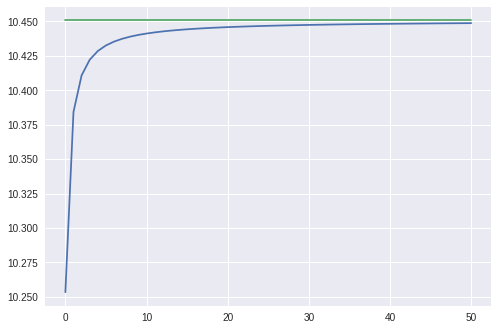

In [10]:
karr = np.arange(0, 51, 1)
#print(karr)
crrarr = np.zeros(len(karr))
for i in range(len(karr)):
  crrarr[i] = np.array(crr_fcn(gbm1,option1, 10+20*karr[i])[2])
#print(crrarr)
plt.plot(karr, crrarr,)
price = np.zeros(len(karr))
for i in range(len(karr)):
  price[i] = price1
plt.plot(karr, price)
plt.show()

*CRR curve converging to BSM line?*

From the graph we can observe the CRR curve converging to the BSM line

**replace 20k with 25k**

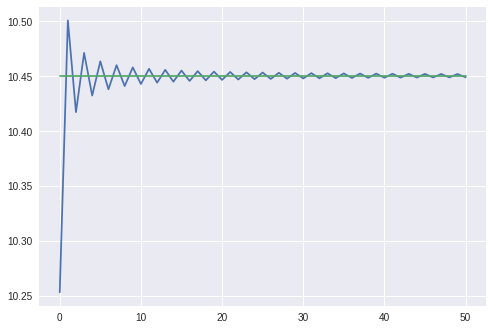

In [11]:
crrarr2 = np.zeros(len(karr))
for i in range(len(karr)):
  crrarr2[i] = np.array(crr_fcn(gbm1,option1, 10+25*karr[i])[2])
plt.plot(karr, crrarr2)
plt.plot(karr, price)
plt.show()

*is the new CRR curve converging to BSM in the same manner?*

From the graph we can see that while with $N=10+25k$, the CRR method is converging to the BSM solution, the curve is not as 'smooth' as the other case, but oscillating above and below the curve